In [3]:
from alternating_least_square import AlternatingLeastSquare

In [19]:

data_dir = '../data/ml-25m/ratings.csv'
als_25m_data = AlternatingLeastSquare(data_dir, embedding_dim=8)
als_25m_data.data_indexing()

In [20]:
als_25m_data.train_test_split()

In [ ]:
user_biases, item_biases ,losses, rmse, losses_test, rmses_test= als_25m_data.alternating_least_square(als_25m_data.data_by_user_train, als_25m_data.data_by_movie_train, lambd=0.1,tau=0.2, gamma=0.01, epochs =10)

Training:  50%|█████████████████████████████████████████████████████████████▌                                                             | 5/10 [20:02<19:19, 231.88s/epoch, test_rmse=0.803]

In [7]:
rmse

[0.8267669270178222,
 0.7741236770769635,
 0.7430554043894618,
 0.727169248191231,
 0.7182004911483602,
 0.7127286082723593,
 0.709332340620891,
 0.7071930052478806,
 0.7057963674821889,
 0.7048452381660851]

In [8]:
rmses_test

[0.9027882109187856,
 0.8609435509339759,
 0.8306683451239485,
 0.8146527160234109,
 0.8054915222663452,
 0.7998921795343796,
 0.7964449184045429,
 0.7943217506485671,
 0.7929948721568274,
 0.7921524047237127]

In [18]:
als_25m_data.create_dummy_user(2116, 5)

movies_dir = '../data/ml-25m/movies.csv'
als_25m_data.recommendation_for_new_user(movies_dir, lambd=0.1,tau=0.2)


[3.56732977 3.65142059 3.74554232 3.77179639 3.96308492 3.96649058
 4.24057934 4.31292224 4.53647311 4.63626325]
You may also like:['Star Trek: The Motion Picture (1979)', 'Dune (1984)', 'Lord of the Rings, The (1978)', 'Star Trek V: The Final Frontier (1989)', 'Star Wars: Episode I - The Phantom Menace (1999)', 'Star Wars: Episode II - Attack of the Clones (2002)', 'Star Wars: Episode III - Revenge of the Sith (2005)', 'Clan of the Cave Bear, The (1986)', 'Black Hole, The (1979)', 'Conquest of the Planet of the Apes (1972)']


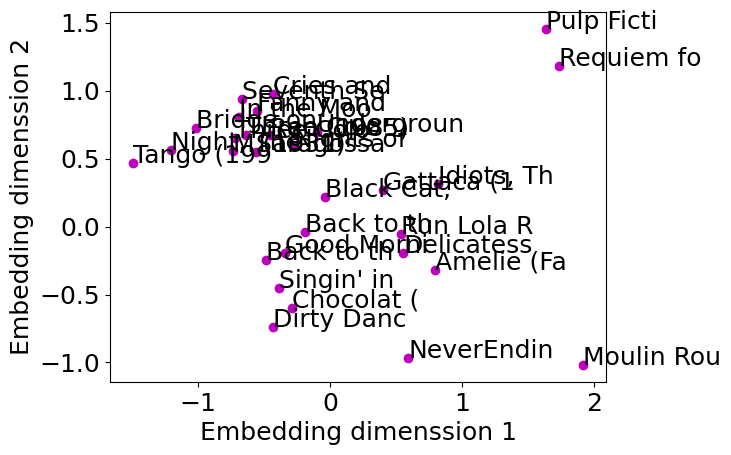

In [13]:
als_25m_data.plot_embedding(movies_dir= movies_dir, points_number=30, fig_name = "embeddings_dim2")

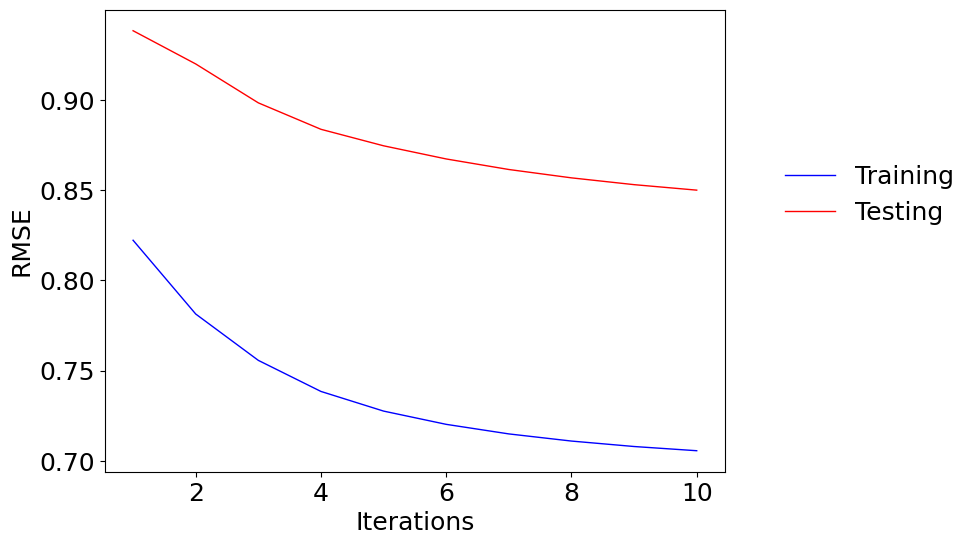

In [8]:

als_25m_data.line_plot(rmse, rmses_test, xaxis = "Iterations", yaxis = "RMSE",  fig_name="b+e_25m_rmse_train_test")

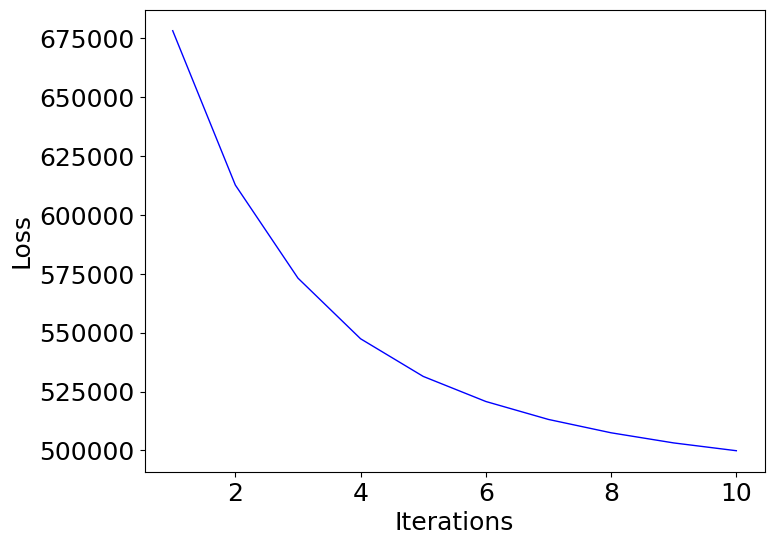

In [9]:
als_25m_data.plot_training_loss_only(losses,xaxis = "Iterations" , yaxis= "Loss", fig_name="b+e_only_125m_loss_train")

In [16]:
latents_dimensions=[2**i for i in range(1, 6)]
best_test_rmses = []
for latent_dimension in latents_dimensions :

    model = AlternatingLeastSquare(data_dir, embedding_dim=latent_dimension)

    model.train_test_split()
    _, _, _, _, _, rmses_test= model.alternating_least_square(model.data_by_user_train, model.data_by_movie_train, lambd=0.1, gamma=0.001, epochs = 5)
    best_test_rmses.append(min(rmses_test))



Training:  60%|██████████████████████████████████████████████████████████████████████████▍                                                 | 3/5 [11:57<07:58, 239.24s/epoch, test_rmse=0.849]


KeyboardInterrupt: 

In [ ]:

plt.plot(latents_dimensions, best_test_rmses)
plt.xlabel("Latents dimensions")
plt.ylabel("Test Rmses")

In [ ]:
import numpy as np

In [16]:
a=np.linspace(5,0, 20)

In [17]:
a

array([5.        , 4.73684211, 4.47368421, 4.21052632, 3.94736842,
       3.68421053, 3.42105263, 3.15789474, 2.89473684, 2.63157895,
       2.36842105, 2.10526316, 1.84210526, 1.57894737, 1.31578947,
       1.05263158, 0.78947368, 0.52631579, 0.26315789, 0.        ])

In [20]:
np.argpartition(a, -2)[-2:]

array([1, 0])